## Importing Libraries

In [3]:
import nltk
nltk.download()
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model


DfTrue=pd.read_csv("True.csv")
DfFake=pd.read_csv("Fake.csv")

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


Matplotlib is building the font cache; this may take a moment.


In [4]:
DfTrue.head(),DfFake.head()

(                                               title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U.S. military to accept transgender recruits o...   
 2  Senior U.S. Republican senator: 'Let Mr. Muell...   
 3  FBI Russia probe helped by Australian diplomat...   
 4  Trump wants Postal Service to charge 'much mor...   
 
                                                 text       subject  \
 0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
 1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
 2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
 3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
 4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
 
                  date  
 0  December 31, 2017   
 1  December 29, 2017   
 2  December 31, 2017   
 3  December 30, 2017   
 4  December 29, 2017   ,
                                                title  \
 0   Donald Trump Se

In [5]:
DfTrue['isFake']=0
DfFake['isFake']=1
DfTrue.head(),DfFake.head()

(                                               title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U.S. military to accept transgender recruits o...   
 2  Senior U.S. Republican senator: 'Let Mr. Muell...   
 3  FBI Russia probe helped by Australian diplomat...   
 4  Trump wants Postal Service to charge 'much mor...   
 
                                                 text       subject  \
 0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
 1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
 2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
 3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
 4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
 
                  date  isFake  
 0  December 31, 2017        0  
 1  December 29, 2017        0  
 2  December 31, 2017        0  
 3  December 30, 2017        0  
 4  December 29, 2017        0  ,
                             

In [6]:
Df = pd.concat([DfTrue,DfFake]).reset_index(drop=True)
Df

,title,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [7]:
Df.drop(columns=['date'],inplace=True)


In [8]:
Df.head()

,title,text,subject,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0


In [9]:
Df['original']=Df['title']+' '+Df['text']
Df.head()

,title,text,subject,isFake,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...


## Cleaning

In [10]:
stop_words = stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use'])

In [11]:
len(gensim.parsing.preprocessing.STOPWORDS),len(stop_words)

(337, 184)

In [12]:
def preprocess(text):
    result=[]
    for word in gensim.utils.simple_preprocess(text):
        if word not in gensim.parsing.preprocessing.STOPWORDS and word not in stop_words:
            result.append(word)
    return result

In [13]:
Df['clean']=Df['original'].apply(preprocess)

In [14]:
Df['clean'][5]

['white',
 'house',
 'congress',
 'prepare',
 'talks',
 'spending',
 'immigration',
 'west',
 'palm',
 'beach',
 'fla',
 'washington',
 'reuters',
 'white',
 'house',
 'said',
 'friday',
 'set',
 'kick',
 'talks',
 'week',
 'republican',
 'democratic',
 'congressional',
 'leaders',
 'immigration',
 'policy',
 'government',
 'spending',
 'issues',
 'need',
 'wrapped',
 'early',
 'new',
 'year',
 'expected',
 'flurry',
 'legislative',
 'activity',
 'comes',
 'republicans',
 'democrats',
 'begin',
 'set',
 'stage',
 'midterm',
 'congressional',
 'elections',
 'november',
 'president',
 'donald',
 'trump',
 'republican',
 'party',
 'eager',
 'maintain',
 'control',
 'congress',
 'democrats',
 'look',
 'openings',
 'wrest',
 'seats',
 'away',
 'senate',
 'house',
 'representatives',
 'wednesday',
 'trump',
 'budget',
 'chief',
 'mick',
 'mulvaney',
 'legislative',
 'affairs',
 'director',
 'marc',
 'short',
 'meet',
 'senate',
 'majority',
 'leader',
 'mitch',
 'mcconnell',
 'house',
 'spea

In [15]:
ListOfWords=[x for y in Df.clean for x in y]
len(ListOfWords),ListOfWords

(9869568,
 ['budget',
  'fight',
  'looms',
  'republicans',
  'flip',
  'fiscal',
  'script',
  'washington',
  'reuters',
  'head',
  'conservative',
  'republican',
  'faction',
  'congress',
  'voted',
  'month',
  'huge',
  'expansion',
  'national',
  'debt',
  'pay',
  'tax',
  'cuts',
  'called',
  'fiscal',
  'conservative',
  'sunday',
  'urged',
  'budget',
  'restraint',
  'keeping',
  'sharp',
  'pivot',
  'way',
  'republicans',
  'representative',
  'mark',
  'meadows',
  'speaking',
  'cbs',
  'face',
  'nation',
  'drew',
  'hard',
  'line',
  'federal',
  'spending',
  'lawmakers',
  'bracing',
  'battle',
  'january',
  'return',
  'holidays',
  'wednesday',
  'lawmakers',
  'begin',
  'trying',
  'pass',
  'federal',
  'budget',
  'fight',
  'likely',
  'linked',
  'issues',
  'immigration',
  'policy',
  'november',
  'congressional',
  'election',
  'campaigns',
  'approach',
  'republicans',
  'seek',
  'control',
  'congress',
  'president',
  'donald',
  'trump

In [16]:
TotalUniques=len(list(set(ListOfWords)))
TotalUniques

114594

In [17]:
Df['CleanedJoined']=Df['clean'].apply(lambda x: " ".join(x))

In [18]:
Df

,title,text,subject,isFake,original,clean,CleanedJoined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, let, mr, mueller...",senior republican senator let mr mueller job w...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...,"[fbi, russia, probe, helped, australian, diplo...",fbi russia probe helped australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon...",trump wants postal service charge amazon shipm...
...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1,McPain: John McCain Furious That Iran Treated ...,"[mcpain, john, mccain, furious, iran, treated,...",mcpain john mccain furious iran treated sailor...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,"[justice, yahoo, settles, mail, privacy, class...",justice yahoo settles mail privacy class actio...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,"[sunnistan, allied, safe, zone, plan, territor...",sunnistan allied safe zone plan territorial bo...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1,How to Blow $700 Million: Al Jazeera America F...,"[blow, million, al, jazeera, america, finally,...",blow million al jazeera america finally calls ...


## Data Visualization

<AxesSubplot:xlabel='count', ylabel='subject'>

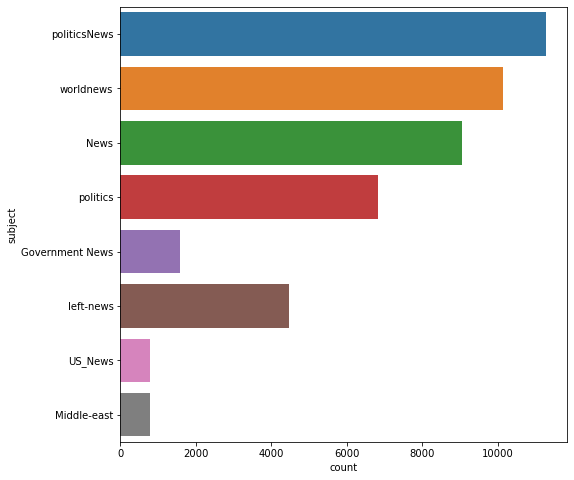

In [19]:
plt.figure(figsize=(8,8))
sns.countplot(y="subject",data=Df)

<AxesSubplot:xlabel='isFake', ylabel='count'>

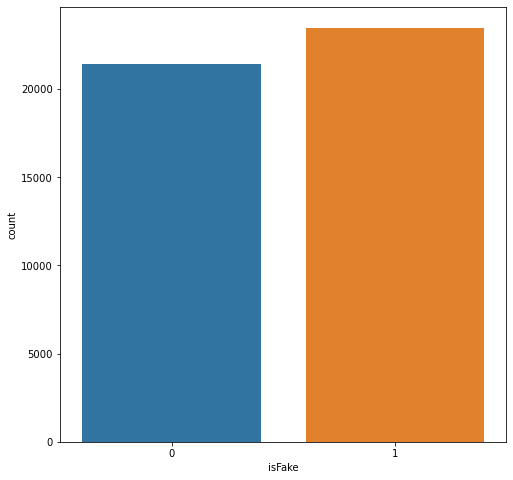

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(x="isFake",data=Df)

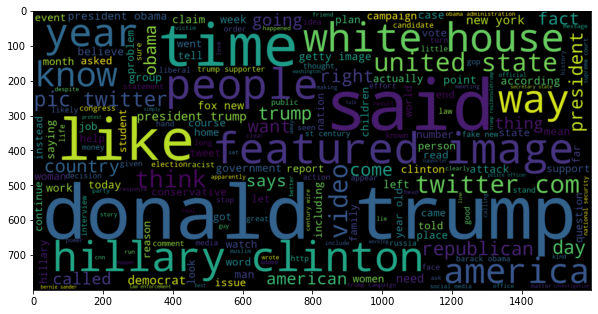

In [21]:
plt.figure(figsize=(10,10))
wc=WordCloud(width=1600,height=800,stopwords=stop_words).generate(" ".join(Df[Df.isFake == 1].CleanedJoined))
plt.imshow(wc,interpolation='bilinear')

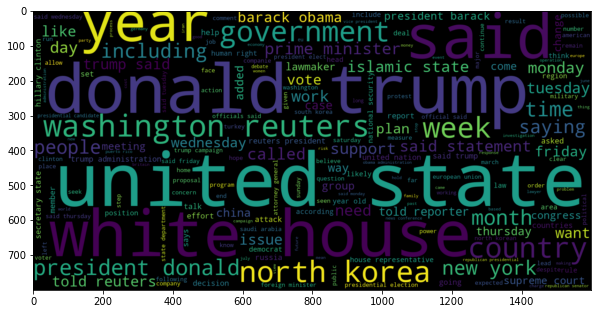

In [22]:
plt.figure(figsize=(10,10))
wc=WordCloud(width=1600,height=800,stopwords=stop_words).generate(" ".join(Df[Df.isFake == 0].CleanedJoined))
plt.imshow(wc,interpolation='bilinear')

In [23]:
maxlen = -1
for doc in Df.CleanedJoined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is : ", maxlen)

The maximum number of words in any document is :  4593


## Tokenization And Preparation

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Df.CleanedJoined, Df.isFake, test_size = 0.2)

In [25]:
tokenizer = Tokenizer(num_words = TotalUniques)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [26]:
padded_train = pad_sequences(train_sequences,maxlen = 4593, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 4593, truncating = 'post') 

In [53]:
model= Sequential()
model.add(Embedding(TotalUniques,output_dim=8))
model.add(Bidirectional(LSTM(4)))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, None, 8)           916752    
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 8)                 416       
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 5         
Total params: 917,209
Trainable params: 917,209
Non-trainable params: 0
_________________________________________________________________


In [54]:
y_train = np.asarray(y_train)
model.fit(padded_train, y_train, batch_size=64,validation_split= 0.1, epochs=2)

Train on 32326 samples, validate on 3592 samples
Epoch 1/2
32326/32326 [==============================] - 3605s 112ms/sample - loss: 0.4081 - acc: 0.8723 - val_loss: 0.2408 - val_acc: 0.9933
Epoch 2/2
32326/32326 [==============================] - 3170s 98ms/sample - loss: 0.1933 - acc: 0.9963 - val_loss: 0.1579 - val_acc: 0.9947


## Performance Assesment

In [47]:
pred = model.predict(padded_test)


In [48]:
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [49]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test),prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.49587973273942093


<AxesSubplot:>

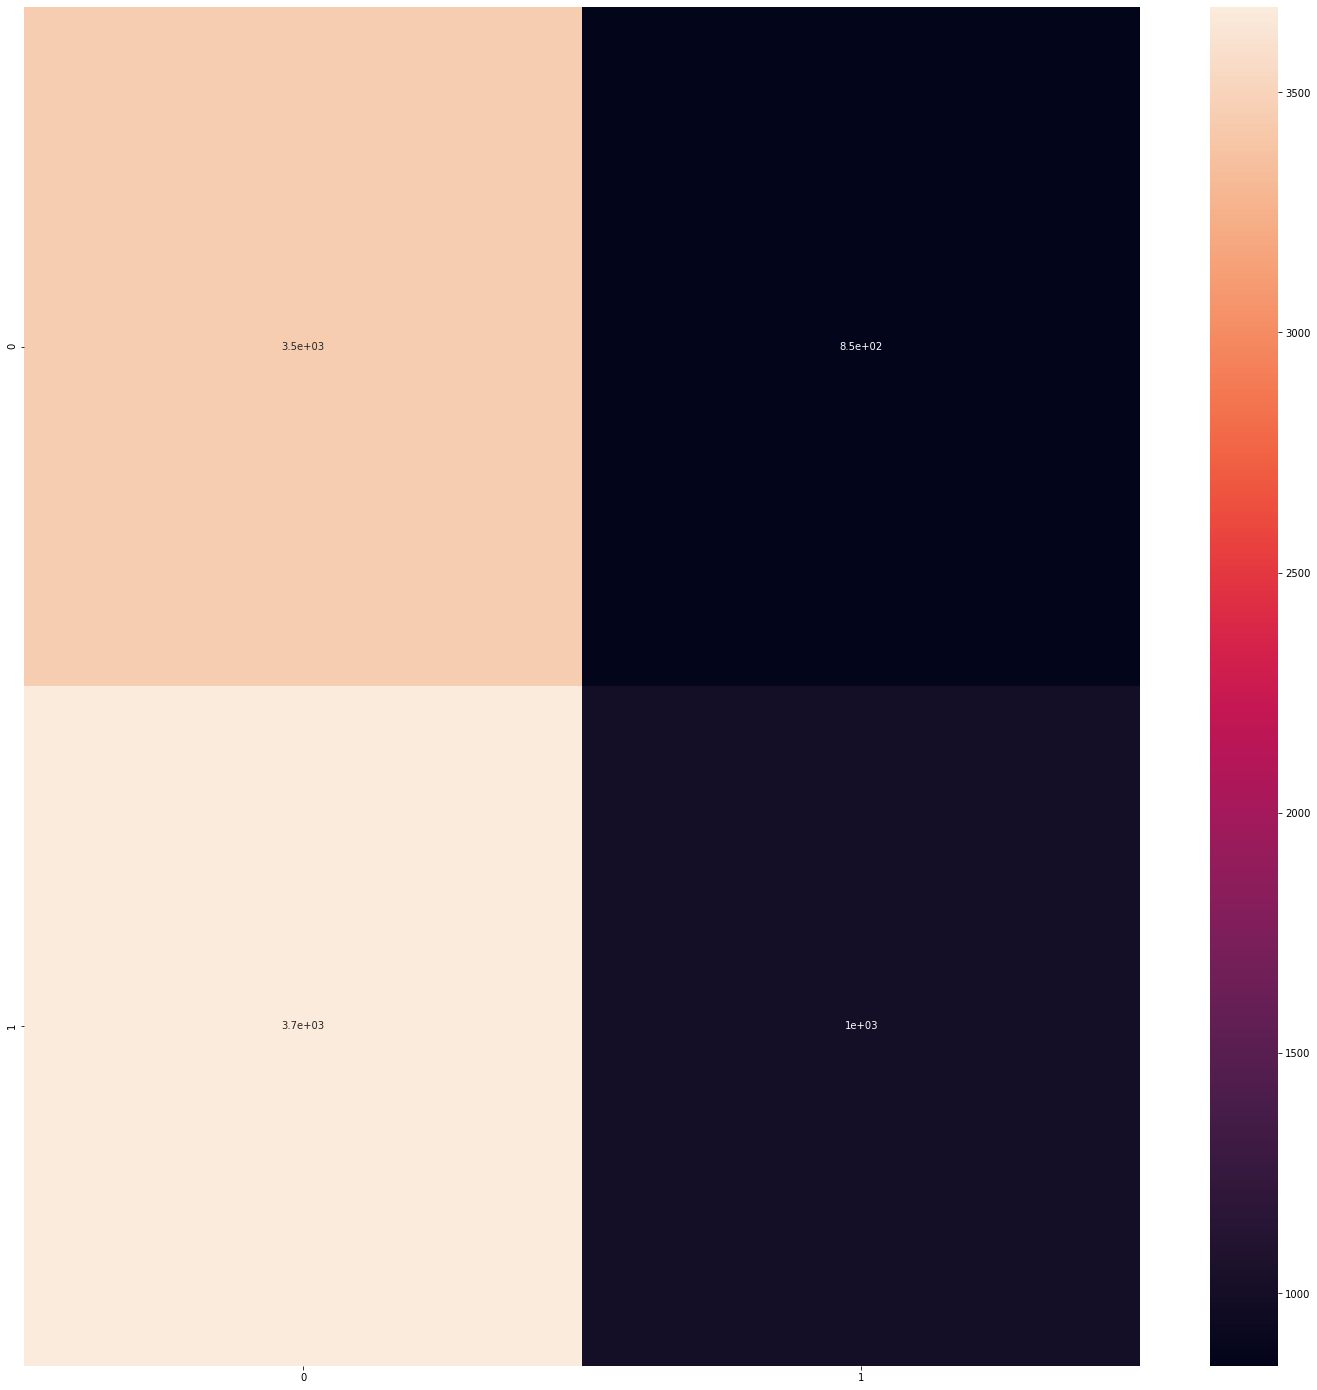

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [52]:
# category = { 0: 'Fake News', 1 : "Real News"}
# # get the results
# for i in range(len(prediction[:5])):
#   print("Title :\n\n" ,df[df.combined == x_test.values[i]].title.item(),"\n\nTopic :\n\n", df[df.combined == x_test.values[i]].subject.item(),
#       "\n\nNews :\n\n", df[df.combined == x_test.values[i]].text.item(), "\n\nOriginal value :\n\n",
#       category[df[df.combined == x_test.values[i]].isfake.item()], "\n\nPredicted value :\n\n", category[prediction[i]], "\n\n\n")